<a href="https://colab.research.google.com/github/MOHITATRISINGH/ml-lab/blob/main/pcaboth_041.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Step 1: Define the dataset
data_dict = {
    "X": [4, 8, 13, 7],
    "Y": [11, 4, 5, 14]
}

# Convert to DataFrame for better visualization
df = pd.DataFrame(data_dict)
print("🔹 Original Data:\n", df)

# Step 2: Construct the data matrix
X = np.array(df["X"])
Y = np.array(df["Y"])
data = np.vstack((X, Y)).T  # Shape (4,2)

# Step 3: Compute the mean of each feature
mean_X = np.mean(X)
mean_Y = np.mean(Y)
mean_vector = np.array([mean_X, mean_Y])
print("\n🔹 Mean of X:", mean_X)
print("🔹 Mean of Y:", mean_Y)

# Step 4: Center the data (subtract mean)
centered_data = data - mean_vector
print("\n🔹 Centered Data (After Mean Subtraction):\n", pd.DataFrame(centered_data, columns=["X_centered", "Y_centered"]))

# Step 5: Compute the covariance matrix
cov_matrix = np.dot(centered_data.T, centered_data) / (len(X) - 1)
print("\n🔹 Covariance Matrix:\n", pd.DataFrame(cov_matrix, index=["X", "Y"], columns=["X", "Y"]))

# Step 6: Compute the eigenvalues and eigenvectors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

# Step 7: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eig_values)[::-1]
eig_values = eig_values[sorted_indices]
eig_vectors = eig_vectors[:, sorted_indices]

# Step 8: Show the characteristic equation
I = np.identity(len(cov_matrix))  # Identity matrix
lambda_matrix = cov_matrix - eig_values[0] * I
print("\n🔹 Characteristic Equation (A - λI) X = 0 for λ₁:")
print(pd.DataFrame(lambda_matrix, index=["X", "Y"], columns=["X", "Y"]))

lambda_matrix2 = cov_matrix - eig_values[1] * I
print("\n🔹 Characteristic Equation (A - λI) X = 0 for λ₂:")
print(pd.DataFrame(lambda_matrix2, index=["X", "Y"], columns=["X", "Y"]))

# Store eigenvalues & corresponding eigenvectors
eig_df = pd.DataFrame({
    "Feature": ["X", "Y"],
    "Eigenvalue": eig_values,
    "Eigenvector (X)": eig_vectors[0],
    "Eigenvector (Y)": eig_vectors[1]
})

print("\n🔹 Eigenvalues & Corresponding Eigenvectors:")
print(eig_df)

# Step 9: Project data onto the principal components
principal_components = centered_data @ eig_vectors  # or np.dot(centered_data, eig_vectors)

# Display Principal Components as PC1 and PC2 in separate columns
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
print("\n🔹 Principal Components (PC1 & PC2):\n", df_pca)




🔹 Original Data:
     X   Y
0   4  11
1   8   4
2  13   5
3   7  14

🔹 Mean of X: 8.0
🔹 Mean of Y: 8.5

🔹 Centered Data (After Mean Subtraction):
    X_centered  Y_centered
0        -4.0         2.5
1         0.0        -4.5
2         5.0        -3.5
3        -1.0         5.5

🔹 Covariance Matrix:
       X     Y
X  14.0 -11.0
Y -11.0  23.0

🔹 Characteristic Equation (A - λI) X = 0 for λ₁:
           X          Y
X -16.384864 -11.000000
Y -11.000000  -7.384864

🔹 Characteristic Equation (A - λI) X = 0 for λ₂:
           X          Y
X   7.384864 -11.000000
Y -11.000000  16.384864

🔹 Eigenvalues & Corresponding Eigenvectors:
  Feature  Eigenvalue  Eigenvector (X)  Eigenvector (Y)
0       X   30.384864         0.557390        -0.830251
1       Y    6.615136        -0.830251        -0.557390

🔹 Principal Components (PC1 & PC2):
         PC1       PC2
0 -4.305187  1.927528
1  3.736129  2.508255
2  5.692828 -2.200389
3 -5.123769 -2.235394



🔹 Mean Vector: [5.84333333 3.054      3.75866667 1.19866667]

🔹 Centered Data (After Mean Subtraction):
      SepalLength  SepalWidth  PetalLength  PetalWidth
0      -0.743333       0.446    -2.358667   -0.998667
1      -0.943333      -0.054    -2.358667   -0.998667
2      -1.143333       0.146    -2.458667   -0.998667
3      -1.243333       0.046    -2.258667   -0.998667
4      -0.843333       0.546    -2.358667   -0.998667
..           ...         ...          ...         ...
145     0.856667      -0.054     1.441333    1.101333
146     0.456667      -0.554     1.241333    0.701333
147     0.656667      -0.054     1.441333    0.801333
148     0.356667       0.346     1.641333    1.101333
149     0.056667      -0.054     1.341333    0.601333

[150 rows x 4 columns]

🔹 Covariance Matrix:
              SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     0.685694   -0.039268     1.273682    0.516904
SepalWidth     -0.039268    0.188004    -0.321713   -0.117981
PetalLength  

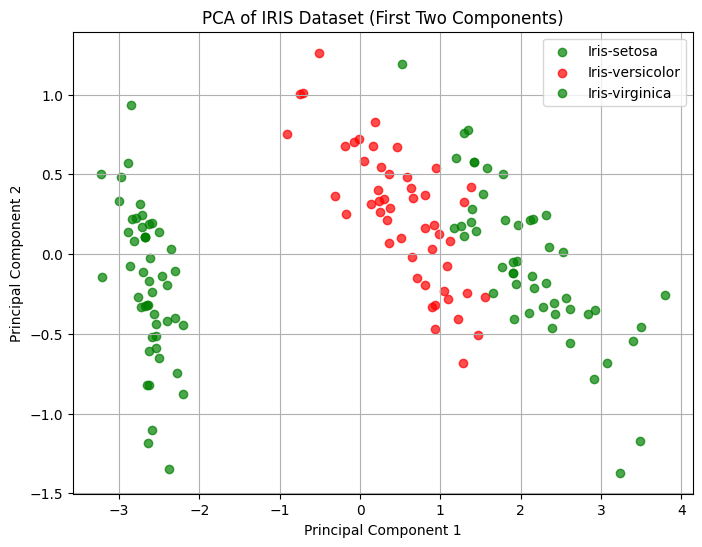

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Iris.csv")
features = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]
X = df[features].values

# Step 1: Compute the mean of each feature and center the data
mean_vector = np.mean(X, axis=0)
print("\n🔹 Mean Vector:", mean_vector)
centered_data = X - mean_vector
print("\n🔹 Centered Data (After Mean Subtraction):\n", pd.DataFrame(centered_data, columns=features))

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)
print("\n🔹 Covariance Matrix:\n", pd.DataFrame(cov_matrix, index=features, columns=features))

# Step 3: Compute the eigenvalues and eigenvectors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print("\n🔹 Eigenvalues:\n", eig_values)
print("\n🔹 Eigenvectors:\n", pd.DataFrame(eig_vectors, index=features, columns=["PC1", "PC2", "PC3", "PC4"]))

# Step 4: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eig_values)[::-1]
eig_values = eig_values[sorted_indices]
eig_vectors = eig_vectors[:, sorted_indices]

# Step 5: Project data onto the first two principal components
principal_components = centered_data @ eig_vectors[:, :2]

# Create a DataFrame for visualization
df_pca = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
df_pca["Species"] = df["Species"]
print("\n🔹 Principal Components (First Two):\n", df_pca)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
species_colors = {"Iris-setosa": "green", "Iris-versicolor": "red", "Iris-virginica": "green"}

for species, color in species_colors.items():
    subset = df_pca[df_pca["Species"] == species]
    plt.scatter(subset["PC1"], subset["PC2"], label=species, color=color, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of IRIS Dataset (First Two Components)")
plt.legend()
plt.grid(True)
plt.show()


